<a href="https://colab.research.google.com/github/syanparth/Email-SMS-Spam-Classifier/blob/main/Email_sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/sample_data/spam.csv', encoding='ISO-8859-1')

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

***1. Data Cleaning***

In [7]:
 df.info() # checking wether columns are needed or not.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# in 2,3,4 columns values are empty
'''So we will drop last 3 columns'''
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# renaming the columns for better understanding
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target']) # to assign 0 value to ham and 1 value to spam

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [15]:
#checking for duplicate values
df.duplicated().sum()

403

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

***2. EDA***

In [19]:
#Checking percentage of ham and spam
df['target'].value_counts()

,count
target,
0,4516
1,653


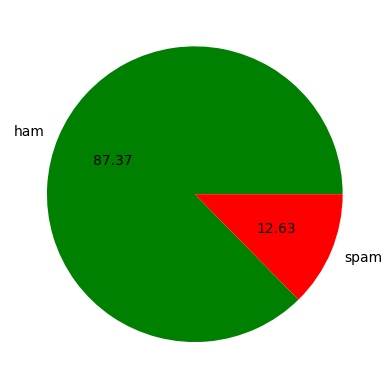

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f",colors=['green','red'])
plt.show()

In [21]:
# Data is not balanced

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
df['num_characters']=df['text'].apply(len)

<ipython-input-23-2d4713a058a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# fetching num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  # dividing sentence on basis of words

<ipython-input-25-699a492887be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  # dividing sentence on basis of words


In [26]:
main_df=df.copy()

In [27]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #dividing the sentence on basis of small sentences

<ipython-input-27-4bfffd31e63a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #dividing the sentence on basis of small sentences


In [28]:
df[['num_characters', 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# This is for ham messages
df[df['target']==0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# This is for spam messages
df[df['target']==1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

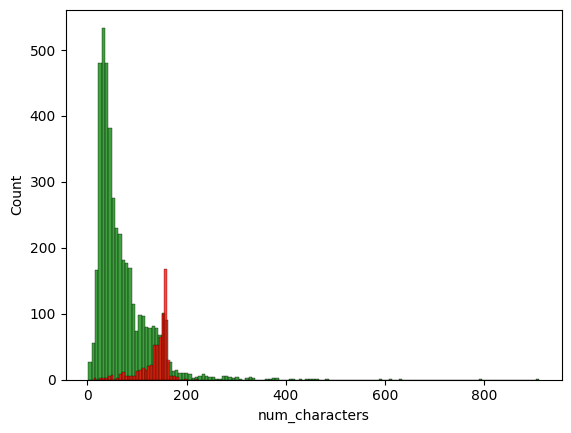

In [32]:
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

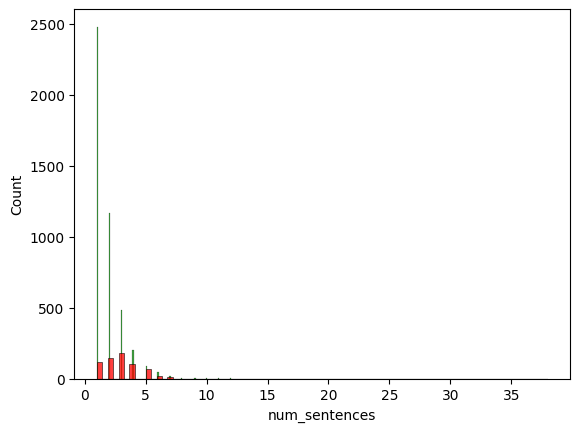

In [33]:
sns.histplot(df[df['target']==0]['num_sentences'],color='green')
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

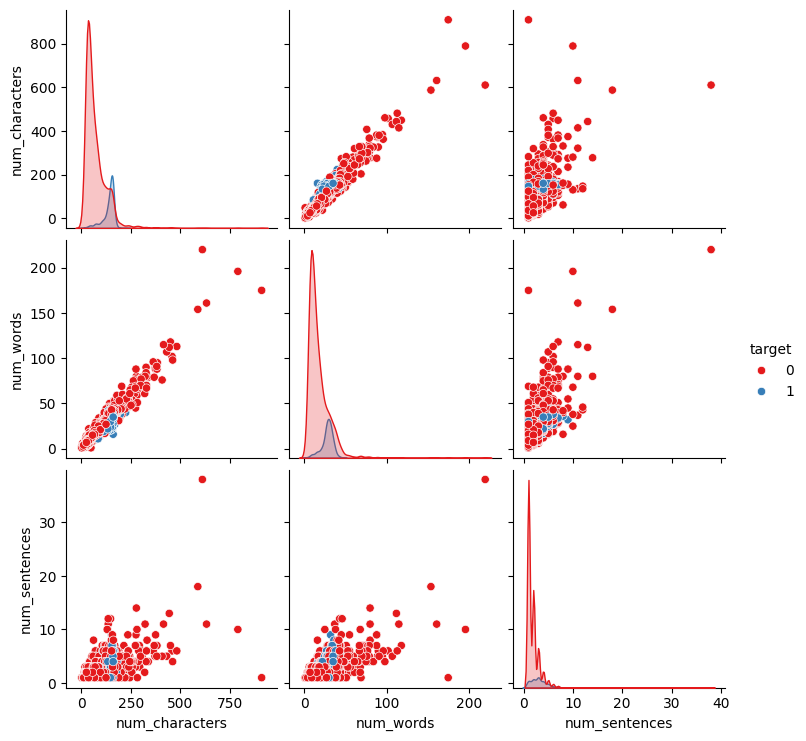

In [34]:
# Checking relationship of number of words with sentences
sns.pairplot(df,hue='target',vars=['num_characters','num_words','num_sentences'],palette='Set1')

In [35]:
# it tells data has outlier

In [36]:
df.drop(columns=['text'],inplace=True) # for applying correlation

<ipython-input-36-3be708962e1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['text'],inplace=True) # for applying correlation


<Axes: >

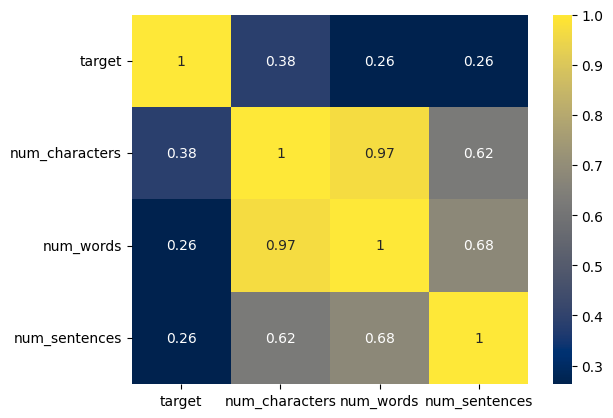

In [37]:
sns.heatmap(df.corr(),annot=True,cmap='cividis')

3. **Data Preprocessing ---> ***LowerCase>Tokenization>RemoveSpeacialCharacters>RemovingStopwords(like is , of , the)>Stemming/Lemitization(converting danced,dancing to dance only)

In [38]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

def text_transform(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)


  text=y[:] #cloning
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation: #for removing stopwords
      y.append(i)

  text=y[:] #cloning
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return  " " .join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
#Stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [40]:
main_df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [41]:
main_df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [42]:
main_df['transformed_text']=main_df['text'].apply(text_transform)

In [43]:
main_df.head()

,target,text,num_characters,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah think goe usf live around though


In [44]:
 from wordcloud import WordCloud
 wc=WordCloud(width=500,height=500,min_font_size=10,background_color='red')

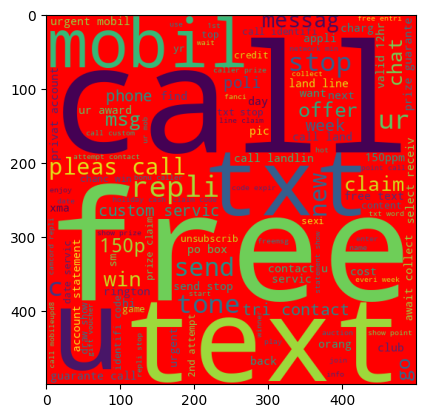

In [45]:
# For Spam messages
spam_wc= wc.generate(main_df[main_df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

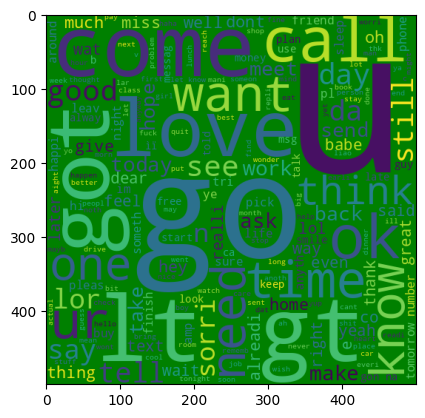

In [46]:
#For Ham Messages
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='green')
ham_wc= wc.generate(main_df[main_df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [47]:
main_df.head()

,target,text,num_characters,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah think goe usf live around though


In [48]:
# Finding top 30 words of spam messages
spam_corpus=[]  # for spam messages
for msg in main_df[main_df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

<ipython-input-50-8464991ade48>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette="viridis" ,color='red')


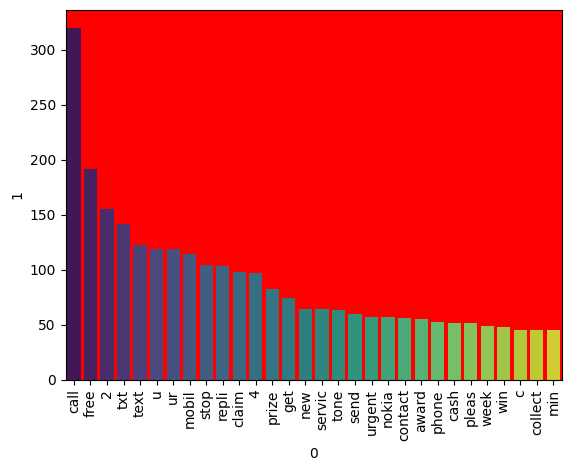

In [50]:
# Before plotting
from collections import Counter
fig, ax = plt.subplots()
ax.set_facecolor('red')
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette="viridis" ,color='red')
plt.xticks(rotation='vertical')
plt.show()

In [51]:
# Finding top 30 words of ham messages
ham_corpus = []  # for ham messages
for msg in main_df[main_df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35404

<ipython-input-53-f9fda42a87bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette="viridis" )


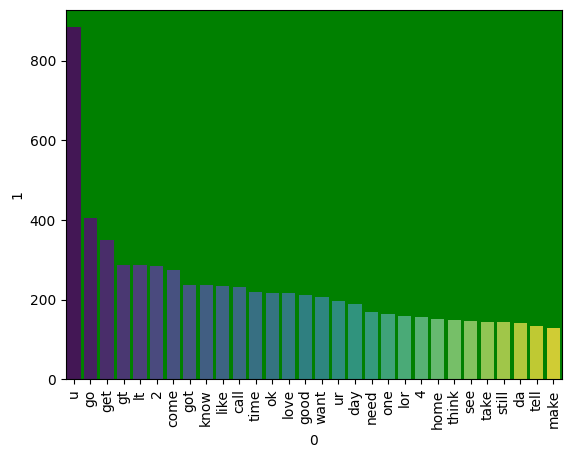

In [53]:
fig, ax = plt.subplots()
ax.set_facecolor('green')
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette="viridis" )
plt.xticks(rotation='vertical')
plt.show()

***4. Model Building***

In [54]:
main_df.head()

,target,text,num_characters,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah think goe usf live around though


In [55]:
# We will vectorize using bag of words

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [57]:
X = tfidf.fit_transform(main_df['transformed_text']).toarray() # we need only numerical data

In [58]:
X.shape #5169->sms , 6708 words

(5169, 6708)

In [59]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [63]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [64]:
# For Gaussian
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [65]:
# For Multinnomial
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [66]:
# For Bernoulii
bnb.fit(X_train,y_train)
y_pred3=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [67]:
# tfidf we have used then mnb

In [68]:
# Imported all Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [69]:
# Called objects here and setted all the hyperparameters
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [75]:
clf ={
    'SVC':svc,
    'KNN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [71]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [72]:
# The eg of running any classifier
train_classifier(dtc,X_train,y_train,X_test,y_test) # in output: (precision , accuracy)

(0.9352030947775629, 0.8380952380952381)

In [73]:
# Applied a loop on dictionary clfs and picked every algo trained the model and stored accuracy score for every algorithim
accuracy_scores=[]
precision_scores=[]

for name,clf in clf.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KNN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  XGB
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [76]:
performance_df=pd.DataFrame({'Algorithm':clf.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [77]:
performance_df

,Algorithm,Accuracy,Precision
1,KNN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
7,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
9,XGB,0.972921,0.943548
4,LR,0.951644,0.940000
8,GBDT,0.952611,0.923810
3,DT,0.935203,0.838095


<ipython-input-78-cf40048bb11c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm',y='Accuracy',data=performance_df,palette='viridis')


<Axes: xlabel='Algorithm', ylabel='Accuracy'>

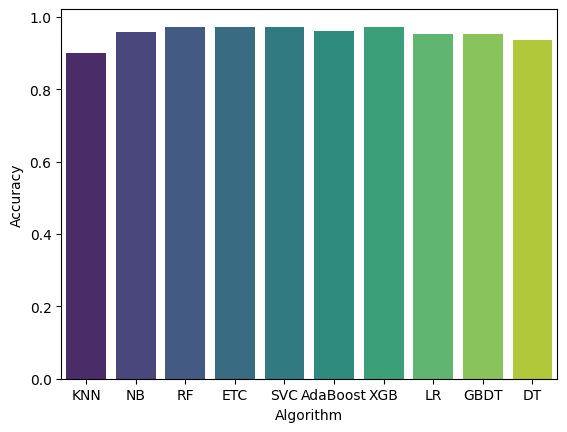

In [78]:
sns.barplot(x='Algorithm',y='Accuracy',data=performance_df,palette='viridis')

Now Conveting this to a website

In [79]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))